### **📝 Instructions**
#### House grouping system
We want to be able to classify houses according to their region and median income. To do this, we will use the famous `California Housing` dataset. It was constructed using data from the 1990 California census. It contains one row per census block group. A block group is the smallest geographic unit for which US Census data is published.

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

from pickle import dump

### **Step 1: Loading the dataset**
The dataset can be found in this project folder under the name `housing.csv`. You can load it into the code directly from the link:

```link
https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv
```
Or download it and add it by hand in your repository. In this case, we are only interested in the `Latitude`, `Longitude` and `MedInc` columns.

Be sure to conveniently split the dataset into `train` and `test` as we have seen in previous lessons. Although these sets are not used to obtain statistics, you can use them to train the unsupervised algorithm and then to make predictions about new points to predict the cluster they are associated with.

In [2]:
# Import DB
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df_raw = df.copy()
df_raw = df_raw[['Latitude', 'Longitude', 'MedInc']]

In [5]:
df_raw.to_csv("../data/raw/df_raw.csv", index=False)

### **Split data**

In [6]:
df_train, df_test = train_test_split(df_raw, test_size=0.2, random_state=42)
df_train.head()

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


### **EDA**

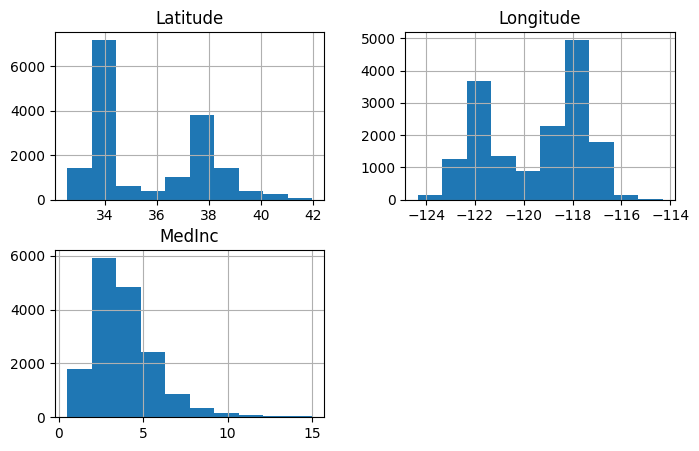

In [7]:
# Univariate Analysis
df_train.hist(figsize=(8,5))
plt.show()

<Figure size 1200x500 with 0 Axes>

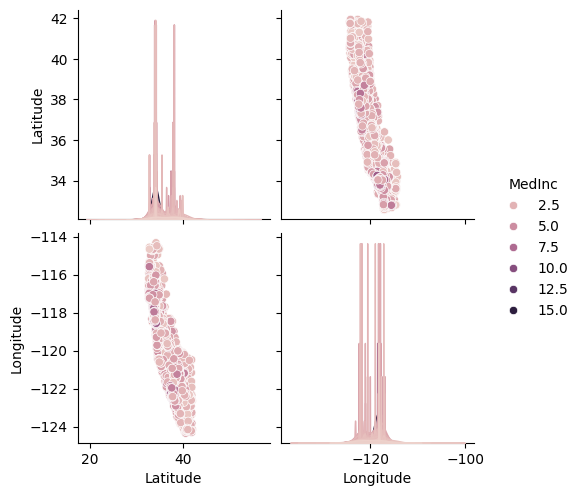

In [8]:
# Bivariate Analysis
plt.figure(figsize=(12,5))
sns.pairplot(data=df_train, hue='MedInc')
plt.show()

Using the 'hue' with the MedInc we observe that there can be 6 classifications

In [9]:
df_train.corr()

,Latitude,Longitude,MedInc
Latitude,1.000000,-0.924485,-0.076571
Longitude,-0.924485,1.000000,-0.017040
MedInc,-0.076571,-0.017040,1.000000


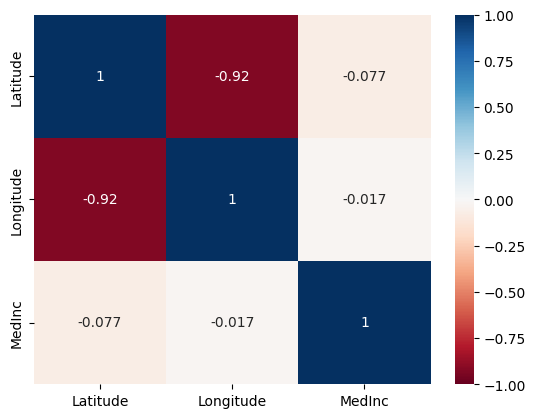

In [10]:
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap='RdBu')
plt.show()

It is common to relate Longitude and Latitude

In [11]:
X_train = df_train
X_test = df_test

### **Step 2: Build a K-Means**
Classify the data into 6 clusters using the K-Means model. Then store the `cluster` to which each house belongs as a new column in the dataset. You could call it cluster. To introduce it to your dataset, you may have to categorize it. See what format and values it has, and act accordingly. Plot it in a dot plot and describe what you see.

In [12]:
model = KMeans(n_clusters=6, n_init='auto', random_state=42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

We need insert `y_train` as Cluster

In [13]:
y_train = list(model.labels_)
df_train['cluster'] = y_train
df_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


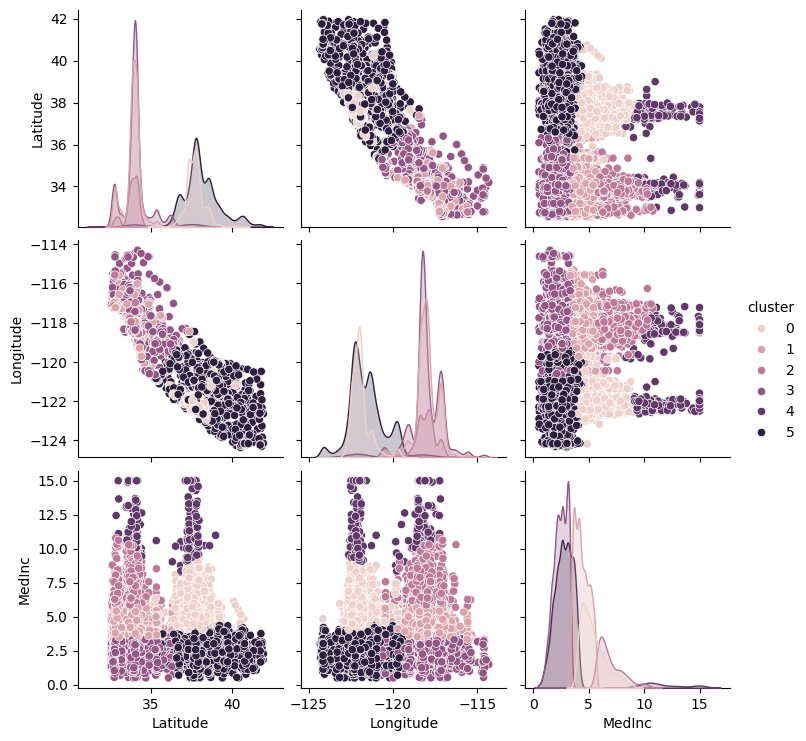

In [14]:
# EDA 2 with cluster
sns.pairplot(data=df_train, hue='cluster')
plt.show()

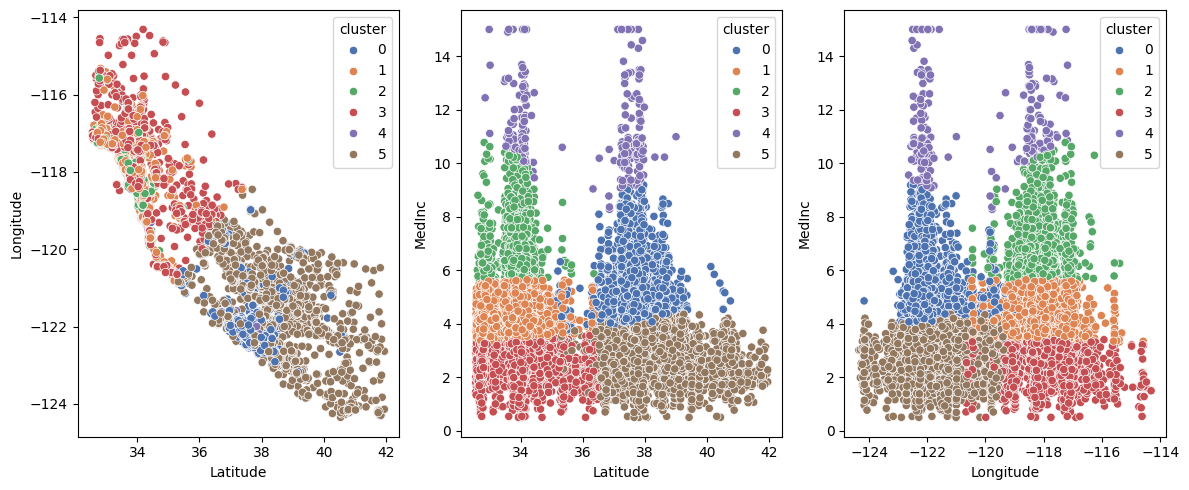

In [18]:
fig, axis = plt.subplots(1, 3, figsize = (12, 5))

sns.scatterplot(ax = axis[0], data = df_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = df_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = df_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

### **Step 3: Predict with the test set**
Now use the trained model with the test set and add the points to the above plot to confirm that the prediction is successful or not.

In [16]:
y_test = list(model.predict(X_test))
df_test["cluster"] = y_test
df_test.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


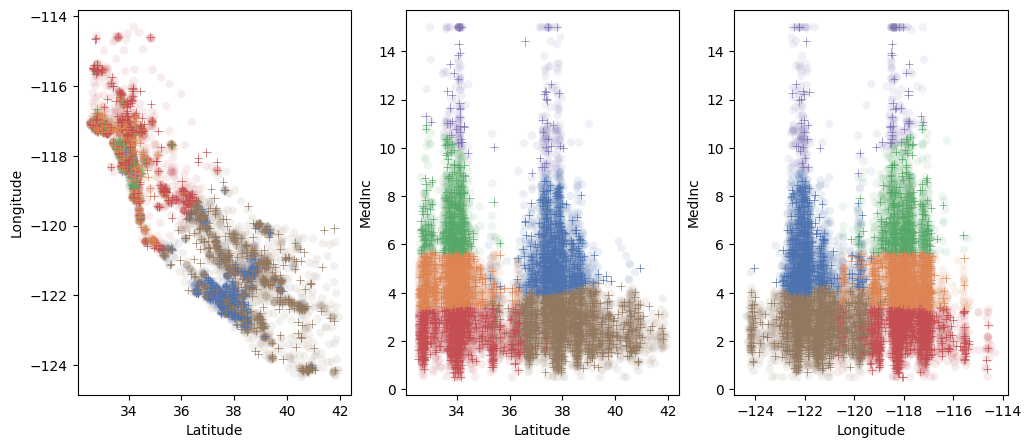

In [23]:
fig, axis = plt.subplots(1, 3, figsize=(12, 5))

sns.scatterplot(ax = axis[0], data = df_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha=0.1)
sns.scatterplot(ax = axis[1], data = df_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha=0.1)
sns.scatterplot(ax = axis[2], data = df_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha=0.1)

sns.scatterplot(ax=axis[0], data=df_test, x='Latitude', y='Longitude', hue='cluster', palette='deep', marker="+")
sns.scatterplot(ax=axis[1], data=df_test, x='Latitude', y='MedInc', hue='cluster', palette='deep', marker="+")
sns.scatterplot(ax=axis[2], data=df_test, x='Longitude', y='MedInc', hue='cluster', palette='deep', marker="+")

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

It is observed that there is great reliability when predicting the results

### **Step 4: Train a supervised classification model**
Now that K-Means has returned a categorization (clustering) of the points for the training and test sets, study which model might be most useful and train it. Get the statistics and describe what you see.

This flow is very common when we have unlabeled data: use an unsupervised learning model to label it automatically, and then a supervised learning model.

In [24]:
model_sup = DecisionTreeClassifier(random_state=42)
model_sup.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

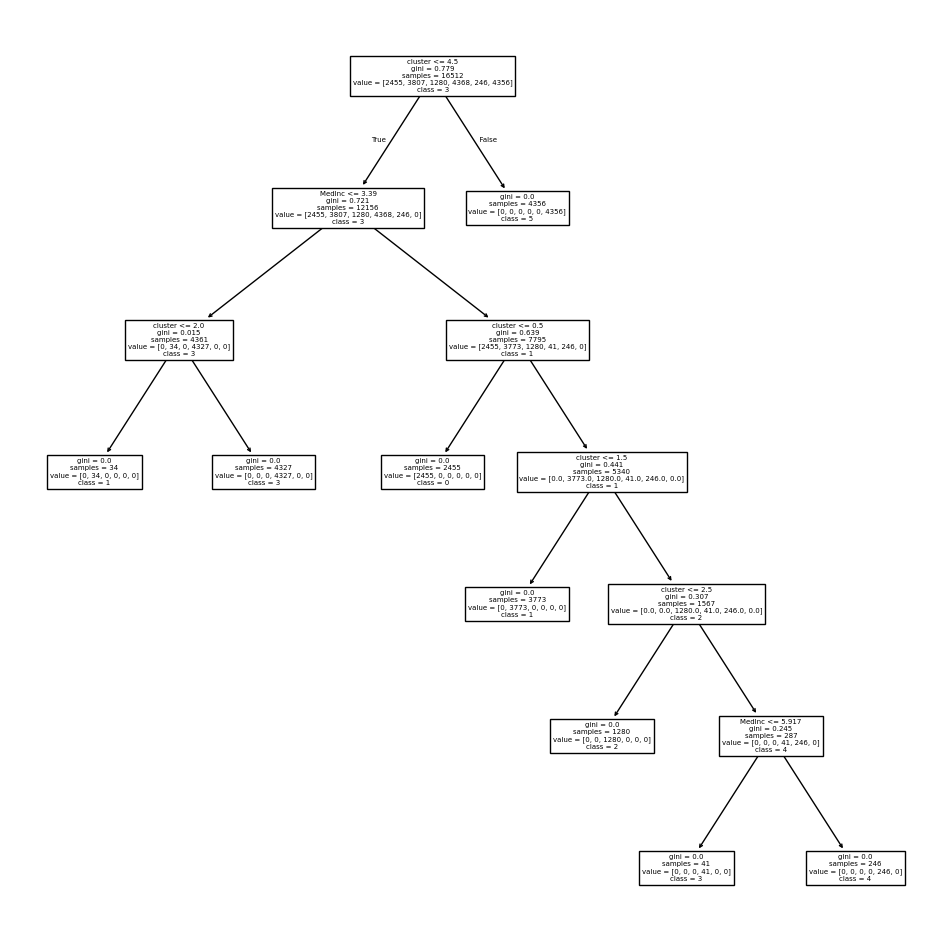

In [25]:
fig = plt.figure(figsize=(12, 12))
tree.plot_tree(model_sup, feature_names=list(df_train.columns), class_names=['0', '1', '2', '3', '4', '5'])
plt.show()

In [27]:
y_pred = model_sup.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [28]:
acc = accuracy_score(y_test, y_pred)
print(f'accuracy_score: {acc}')

accuracy_score: 1.0


### **Step 5: Save the models**
Store both models in the corresponding folder.

In [29]:
dump(model, open("../models/k-means.sav", 'wb'))
dump(model_sup, open("../models/dtc.sav", 'wb'))